In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving flood.csv to flood.csv


In [ ]:
df = pd.read_csv('flood.csv')
df

,Date,Rainfall (mm),Surma River Level(cm above danger line),Soil Moisture Condition
0,01/05/2022,20,40,Dry
1,02/05/2022,90,80,Dry
2,03/05/2022,15,45,Dry
3,04/05/2022,85,35,Dry
4,05/05/2022,90,95,Dry
5,06/05/2022,90,30,Dry
6,07/05/2022,10,40,Dry
7,08/05/2022,20,89,Dry
8,09/05/2022,30,60,Dry
9,10/05/2022,25,55,Dry


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', dayfirst=True)

In [ ]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

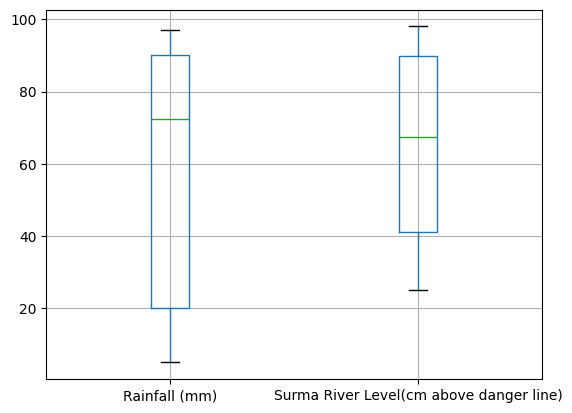

In [ ]:
df.boxplot(column=['Rainfall (mm)', 'Surma River Level(cm above danger line)'])
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Soil Moisture Condition'] = le.fit_transform(df['Soil Moisture Condition'])

In [ ]:
df['Flood'] = (df['Rainfall (mm)'] > 60) | (df['Surma River Level(cm above danger line)'] > 60 )

In [ ]:

correlation_matrix = df.corr()

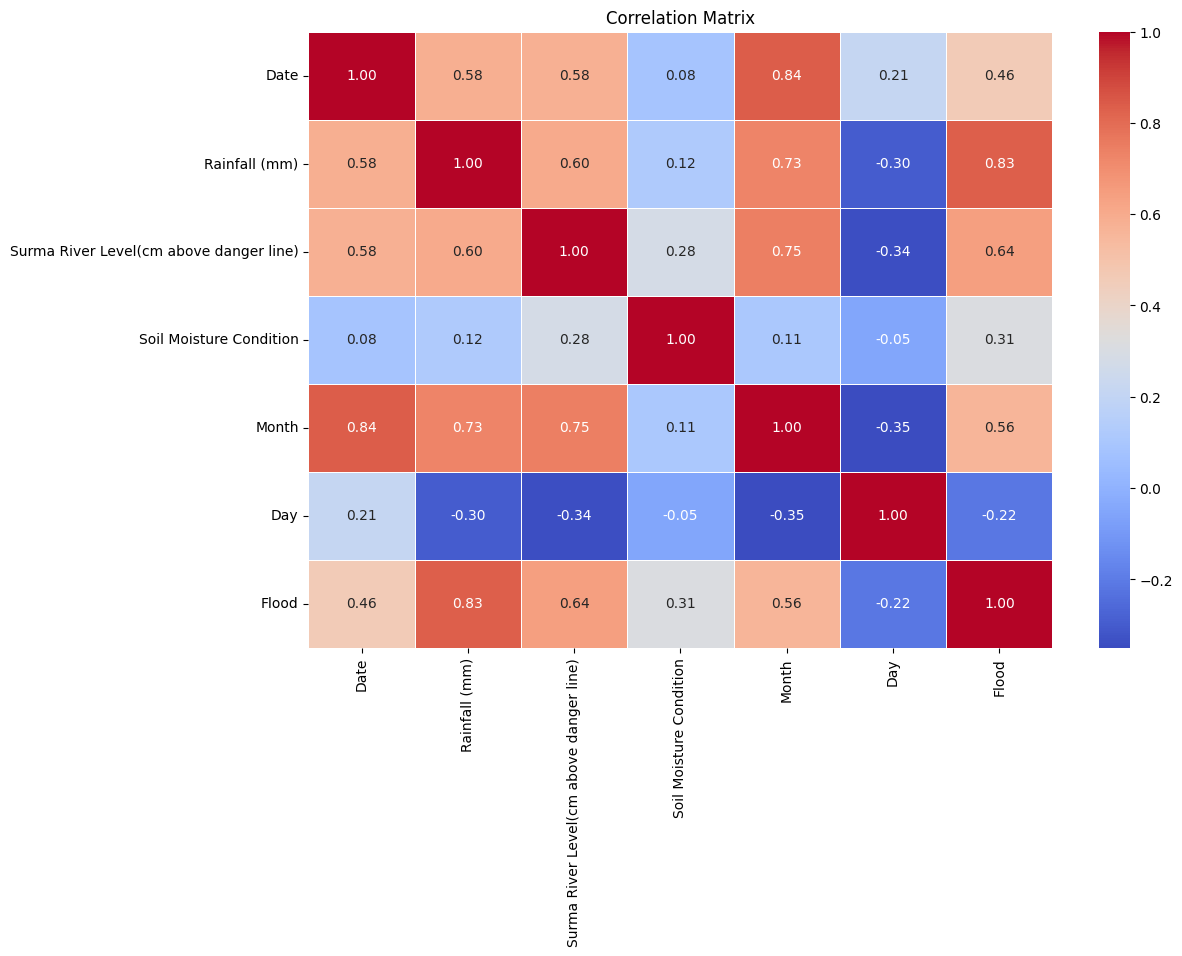

In [ ]:
# Plot correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df

,Date,Rainfall (mm),Surma River Level(cm above danger line),Soil Moisture Condition,Month,Day,Flood
0,2022-05-01,20,40,0,5,1,False
1,2022-05-02,90,80,0,5,2,True
2,2022-05-03,15,45,0,5,3,False
3,2022-05-04,85,35,0,5,4,True
4,2022-05-05,90,95,0,5,5,True
5,2022-05-06,90,30,0,5,6,True
6,2022-05-07,10,40,0,5,7,False
7,2022-05-08,20,89,0,5,8,True
8,2022-05-09,30,60,0,5,9,False
9,2022-05-10,25,55,0,5,10,False


In [ ]:
X = df[['Rainfall (mm)', 'Surma River Level(cm above danger line)', 'Month', 'Day'] +
       [col for col in df.columns if 'Soil Moisture Condition' in col]]
y = df['Flood']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy:', accuracy)


Model Accuracy: 0.9


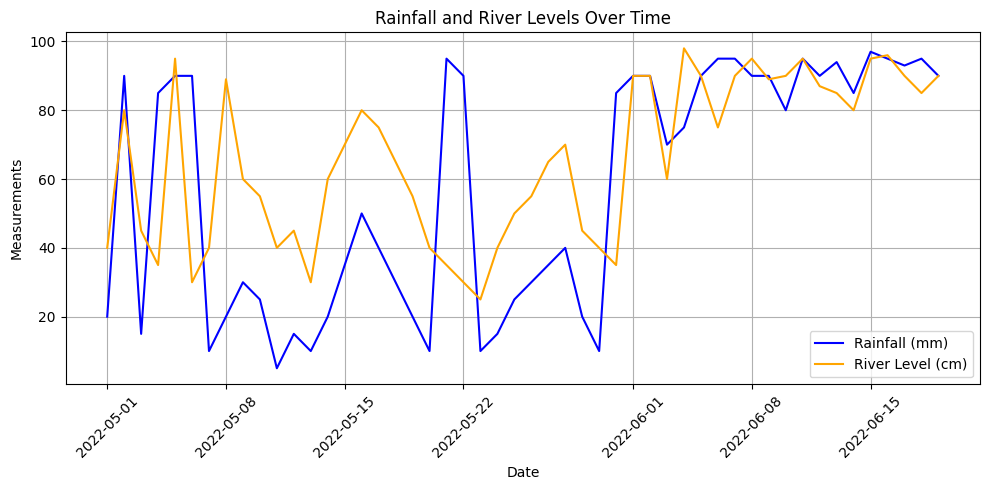

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Rainfall (mm)'], label='Rainfall (mm)', color='blue')
plt.plot(df['Date'], df['Surma River Level(cm above danger line)'], label='River Level (cm)', color='orange')
plt.title('Rainfall and River Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Measurements')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

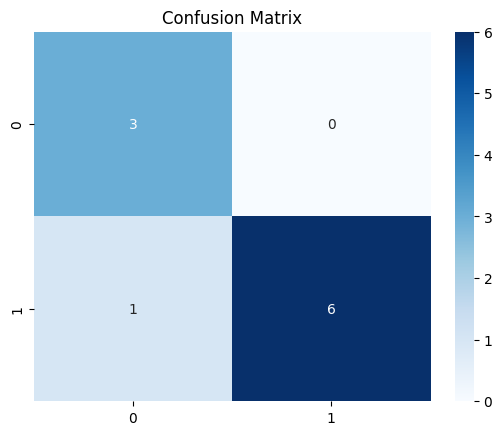

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hurricane.csv to hurricane.csv


In [ ]:

from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df2= pd.read_csv('hurricane.csv')
df2.head()


,Date,Temperature (°C),Humidity (%),Wind Speed (km/h),Hurricane
0,2021-08-20,30.5,75,100,0
1,2021-08-21,31.0,78,120,1
2,2021-08-22,32.0,70,90,0
3,2021-08-23,33.5,60,150,1
4,2021-08-24,30.0,85,80,0


In [ ]:
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d')

In [ ]:
df2.corr()

,Date,Temperature (°C),Humidity (%),Wind Speed (km/h),Hurricane
Date,1.000000,-0.115529,0.231204,0.076106,0.091462
Temperature (°C),-0.115529,1.000000,-0.743983,0.352018,0.439432
Humidity (%),0.231204,-0.743983,1.000000,-0.212339,-0.267630
Wind Speed (km/h),0.076106,0.352018,-0.212339,1.000000,0.756909
Hurricane,0.091462,0.439432,-0.267630,0.756909,1.000000


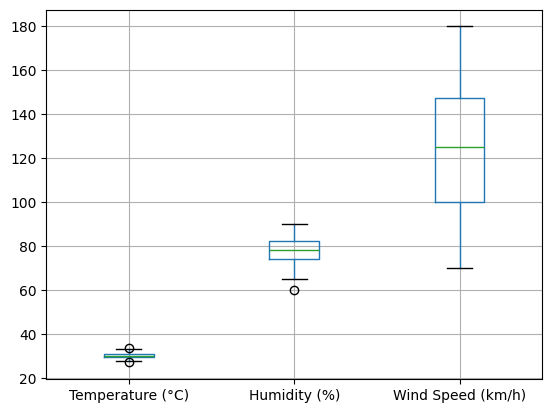

In [ ]:
df2.boxplot(column=['Temperature (°C)', 'Humidity (%)', 'Wind Speed (km/h)'])
plt.show()

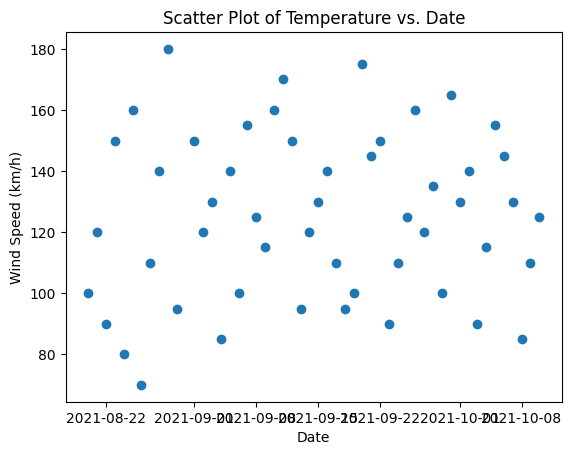

In [ ]:
plt.scatter(x=df2['Date'], y=df2['Wind Speed (km/h)'])
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.title('Scatter Plot of Temperature vs. Date')
plt.show()

In [ ]:
df2.isnull().sum()

,0
Date,0
Temperature (°C),0
Humidity (%),0
Wind Speed (km/h),0
Hurricane,0


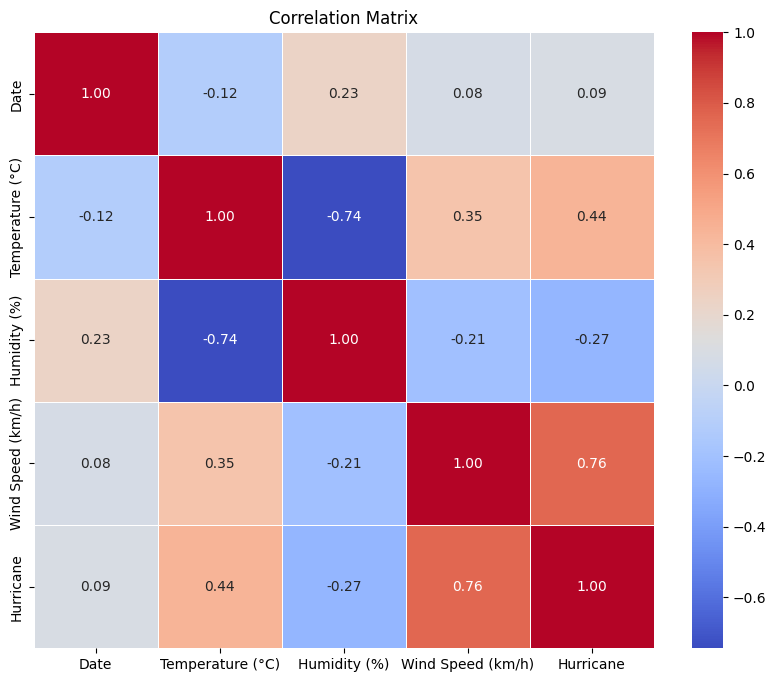

In [ ]:
cm = df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X = df2[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (km/h)']]
y = df2['Hurricane']



In [ ]:
X_train, X_test, y_train, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred2 = model.predict(X_test_scaled)


In [ ]:
accuracy = accuracy_score(y_test2, y_pred2)
print('Hurricane Prediction Model Accuracy:', accuracy)


Hurricane Prediction Model Accuracy: 0.9090909090909091


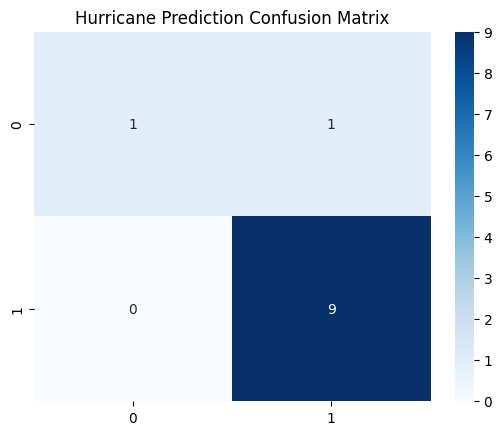

In [ ]:
cm = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Hurricane Prediction Confusion Matrix')
plt.show()

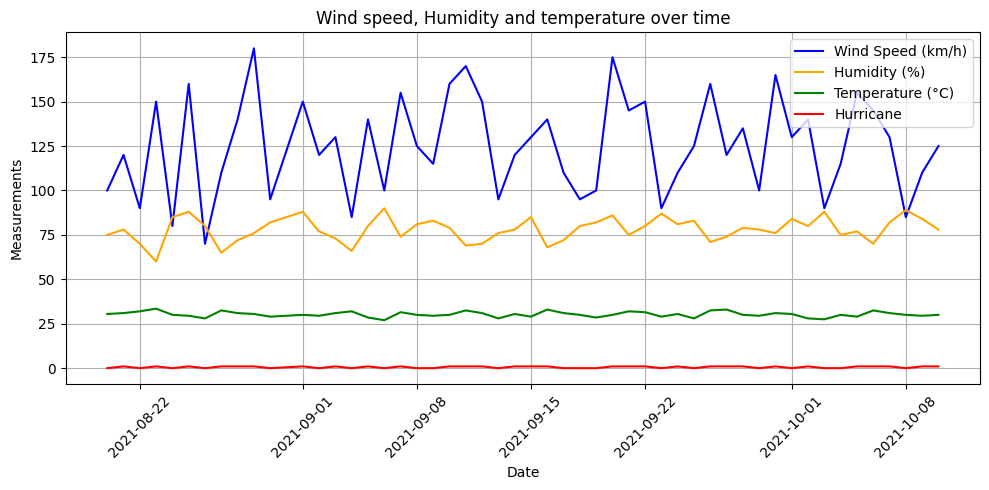

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df2['Date'], df2['Wind Speed (km/h)'], label='Wind Speed (km/h)', color='blue')
plt.plot(df2['Date'], df2['Humidity (%)'], label='Humidity (%)', color='orange')
plt.plot(df2['Date'], df2['Temperature (°C)'], label='Temperature (°C)', color='green')
plt.plot(df2['Date'], df2['Hurricane'], label='Hurricane', color='red')
plt.title("Wind speed, Humidity and temperature over time")
plt.xlabel('Date')
plt.ylabel('Measurements')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
uploaded = files.upload()

Saving earthquake.csv to earthquake (1).csv


In [ ]:
df3 = pd.read_csv('earthquake.csv')
df3.head()

,Date,Temperature (°C),Humidity (%),Magnitude,Wind Speed (km/h)
0,2020-01-15,25.3,65,6.2,15
1,2020-01-16,26.0,70,5.8,18
2,2020-01-20,24.8,60,6.5,20
3,2020-02-10,22.4,55,7.0,12
4,2020-02-12,23.0,60,6.3,15


In [ ]:
df3['Date'] = pd.to_datetime(df3['Date'], format='%Y-%m-%d')

In [ ]:
df3['Earthquake'] = np.where(df3['Magnitude'] > 6.0, 1, 0)

In [ ]:
df3

,Date,Temperature (°C),Humidity (%),Magnitude,Wind Speed (km/h),Earthquake
0,2020-01-15,25.3,65,6.2,15,1
1,2020-01-16,26.0,70,5.8,18,0
2,2020-01-20,24.8,60,6.5,20,1
3,2020-02-10,22.4,55,7.0,12,1
4,2020-02-12,23.0,60,6.3,15,1
5,2020-02-25,21.5,50,5.5,10,0
6,2020-03-05,20.0,75,6.8,17,1
7,2020-03-18,19.5,80,5.9,14,0
8,2020-04-02,24.2,55,6.7,11,1
9,2020-04-15,25.0,62,7.1,16,1


In [ ]:
X = df3[['Temperature (°C)', 'Humidity (%)', 'Magnitude']]
y = df3['Earthquake']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression Model Accuracy:', accuracy)


Logistic Regression Model Accuracy: 1.0


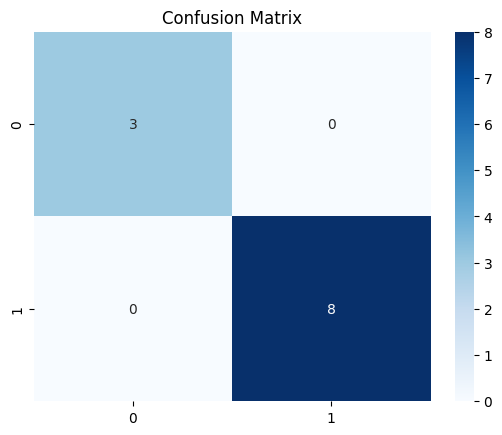

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

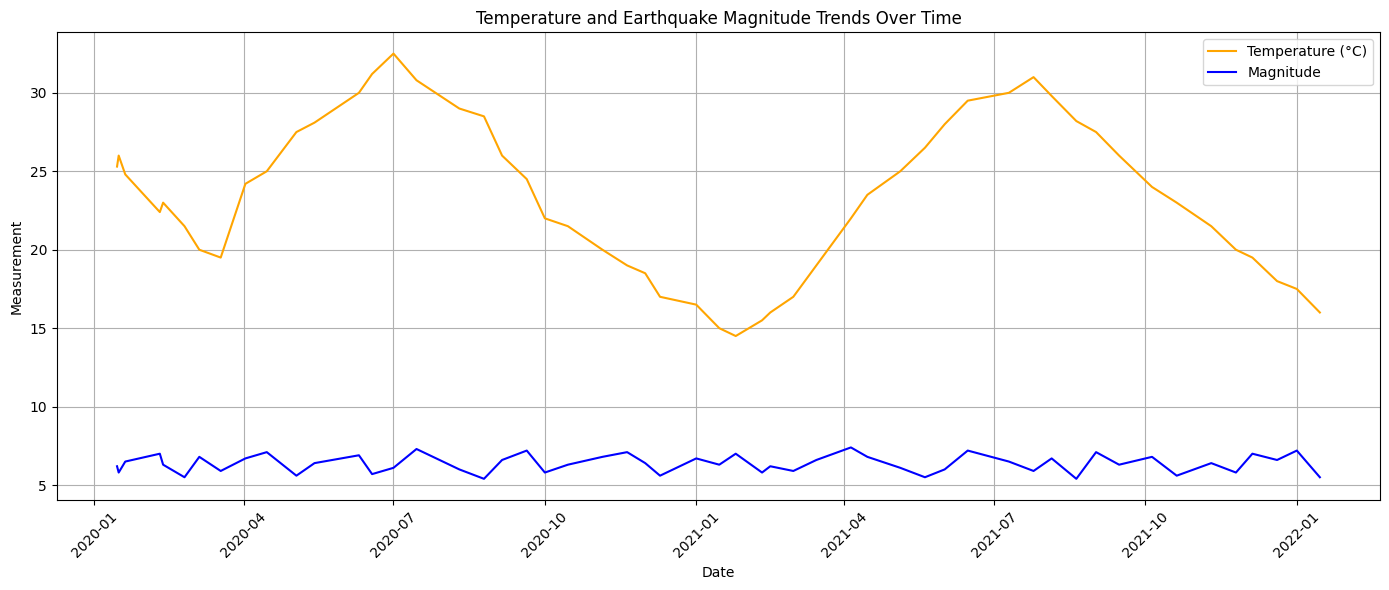

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df3['Date'], df3['Temperature (°C)'], label='Temperature (°C)', color='orange')
plt.plot(df3['Date'], df3['Magnitude'], label='Magnitude', color='blue')

plt.title('Temperature and Earthquake Magnitude Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Measurement')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()